<a href="https://colab.research.google.com/github/wave010/New-York-City-Airbnb-Market/blob/main/New_York_City_Airbnb_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Airbnb Market**

dataset : https://www.kaggle.com/datasets/ebrahimelgazar/new-york-city-airbnb-market



**Airbnb** คือ ระบบการจองห้องพักในประเทศต่างๆ ผ่านโลกออนไลน์ โดยผู้ที่ต้องการจองห้องพัก สามารถติดต่อกับผู้ให้บริการที่พักผ่านระบบอินเทอร์เนตได้โดยตรง เช่น ถ้าคุณมีห้องคอนโดว่างๆอยู่ ไม่ได้ใช้ในการอยู่อาศัย หรือ ใครคนอื่นๆเช้าในระยะยาว คุณสามารถสมัครเพื่อเป็นโฮสใน Airbnb ได้ เมื่อมีผู้ที่ต้องการเดินทางมาที่เมืองที่คุณอยู่ แต่อาจจะไม่ต้องการพักในโรงแรม จะสามารถเข้ามาดูข้อมูลในเว็บไซต์ รวมทั้งแอฟลิเคชั่นของ Airbnb ได้ และสามารถติดต่อพุดคุยกับคุณได้โดยตรง เพื่อกำหนดวันที่จะเข้ามาพักได้ด้วยตัวเอง [อ่นเพิ่มเติม](https://www.ananda.co.th/blog/thegenc/start-up-airbnb/)

##***Get data***

In [1]:
!gdown --id 1kg5NnZTtptGrCK8DzYSkl3yo1IXLmwU- #download data file in google drive

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kg5NnZTtptGrCK8DzYSkl3yo1IXLmwU-
To: /content/NewYorkCity_AirbnbMarket.zip
100% 1.43M/1.43M [00:00<00:00, 95.6MB/s]


In [2]:
!unzip NewYorkCity_AirbnbMarket.zip # Extract file zip

Archive:  NewYorkCity_AirbnbMarket.zip
  inflating: airbnb_last_review.csv  
  inflating: airbnb_price.csv        
  inflating: airbnb_room_type.xlsx   


**read file**

In [57]:
import pandas as pd

# read csv file to DataFrame
review = pd.read_csv("airbnb_last_review.csv")
price = pd.read_csv("airbnb_price.csv")

# read excel file to DataFrame
roomType = pd.read_excel("airbnb_room_type.xlsx","airbnb_room_type")

In [58]:
print(review.shape) # review DataFrame
review.head()

(25209, 3)


,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [59]:
print(price.shape) # price DataFrame
price.head()

(25209, 3)


,listing_id,price,nbhood_full
0,2595,225 dollars,"Manhattan, Midtown"
1,3831,89 dollars,"Brooklyn, Clinton Hill"
2,5099,200 dollars,"Manhattan, Murray Hill"
3,5178,79 dollars,"Manhattan, Hell's Kitchen"
4,5238,150 dollars,"Manhattan, Chinatown"


In [60]:
print(roomType.shape) # roomType DataFrame
roomType.head()

(25209, 3)


,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [61]:
#check column
print(review.columns)
print(price.columns)
print(roomType.columns)

Index([' listing_id', 'host_name', 'last_review'], dtype='object')
Index(['listing_id', 'price', 'nbhood_full'], dtype='object')
Index(['listing_id', 'description', 'room_type'], dtype='object')


In [62]:
#removing space
review.columns = review.columns.str.lstrip()

In [63]:
#check column
print(review.columns)

Index(['listing_id', 'host_name', 'last_review'], dtype='object')


**merge DataFrame**

In [64]:
df_merge = pd.merge(review, price, on='listing_id')
df = pd.merge(df_merge, roomType, on='listing_id')
df.head()

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
0,2595,Jennifer,May 21 2019,225 dollars,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt
1,3831,LisaRoxanne,July 05 2019,89 dollars,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Chris,June 22 2019,200 dollars,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Shunichi,June 24 2019,79 dollars,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room
4,5238,Ben,June 09 2019,150 dollars,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


# **Exploratory Data Analysis (EDA)**

In [65]:
df.shape # check size data

(25209, 7)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
 3   price        25209 non-null  object
 4   nbhood_full  25209 non-null  object
 5   description  25199 non-null  object
 6   room_type    25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [67]:
df.isnull().sum() # check null data

listing_id      0
host_name       8
last_review     0
price           0
nbhood_full     0
description    10
room_type       0
dtype: int64

In [68]:
df[df.isnull().any(axis=1)] #show null data

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
263,100184,NaN,July 08 2019,50 dollars,"Queens, Queens Village",Bienvenue,private room
3040,4183989,NaN,May 23 2019,86 dollars,"Manhattan, Harlem",SPRING in the City!! Zen-Style Tranquil Bedroom,Private room
4039,6292866,NaN,June 19 2019,85 dollars,"Brooklyn, East Flatbush",Modern Quiet Gem Near All,entire home/apt
4269,6786181,NaN,June 19 2019,100 dollars,"Brooklyn, East Flatbush",R&S Modern Spacious Hideaway,Entire home/apt
4688,7851219,John,June 18 2019,60 dollars,"Brooklyn, Williamsburg",NaN,PRIVATE ROOM
4690,7854307,John,June 15 2019,60 dollars,"Brooklyn, Williamsburg",NaN,private room
4696,7858673,John,June 08 2019,60 dollars,"Brooklyn, Williamsburg",NaN,Private room
4707,7873655,John,June 21 2019,60 dollars,"Brooklyn, Williamsburg",NaN,PRIVATE ROOM
4709,7886635,John,June 18 2019,60 dollars,"Brooklyn, Williamsburg",NaN,Private room
4717,7901635,John,June 23 2019,60 dollars,"Brooklyn, Williamsburg",NaN,Private room


In [69]:
df.dropna(inplace=True) #drop null data

In [70]:
df.isnull().sum()

listing_id     0
host_name      0
last_review    0
price          0
nbhood_full    0
description    0
room_type      0
dtype: int64

In [71]:
df.shape

(25191, 7)

# **Data Preprocessing**

**price**

In [72]:
#romiving 'dollars' 
df['price'].replace('dollars','',regex=True, inplace=True)

#remove space
df['price'] = df['price'].str.strip()

#change type data
df['price'] = df['price'].astype('int64')

In [73]:
df[df['price'] == 0] #check price == 0

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
10861,20333471,Anisha,June 24 2019,0,"Bronx, East Morrisania",‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,PRIVATE ROOM
10958,20523843,Martial Loft,May 18 2019,0,"Brooklyn, Bushwick","MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",PRIVATE ROOM
11023,20639628,Adeyemi,June 15 2019,0,"Brooklyn, Bedford-Stuyvesant",Spacious comfortable master bedroom with nice ...,private room
11024,20639792,Adeyemi,June 21 2019,0,"Brooklyn, Bedford-Stuyvesant",Contemporary bedroom in brownstone with nice view,Private room
11025,20639914,Adeyemi,June 23 2019,0,"Brooklyn, Bedford-Stuyvesant",Cozy yet spacious private brownstone bedroom,PRIVATE ROOM
11577,21291569,Sergii,June 22 2019,0,"Brooklyn, Bushwick",Coliving in Brooklyn! Modern design / Shared room,Shared room
11589,21304320,Sergii,May 24 2019,0,"Brooklyn, Bushwick",Best Coliving space ever! Shared room.,Shared room


In [74]:
df['price'][df['price'] == 0] = df['price'].mean() # Fill in the data using averages.

<ipython-input-74-6ffd7972569c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][df['price'] == 0] = df['price'].mean() # Fill in the data using averages.


In [75]:
# check 
df.loc[df['listing_id'].isin([20333471, 20523843, 20639628, 20639792, 20639914, 21291569, 21304320	])]

,listing_id,host_name,last_review,price,nbhood_full,description,room_type
10861,20333471,Anisha,June 24 2019,141.816998,"Bronx, East Morrisania",‚òÖHostel Style Room | Ideal Traveling Buddies‚òÖ,PRIVATE ROOM
10958,20523843,Martial Loft,May 18 2019,141.816998,"Brooklyn, Bushwick","MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",PRIVATE ROOM
11023,20639628,Adeyemi,June 15 2019,141.816998,"Brooklyn, Bedford-Stuyvesant",Spacious comfortable master bedroom with nice ...,private room
11024,20639792,Adeyemi,June 21 2019,141.816998,"Brooklyn, Bedford-Stuyvesant",Contemporary bedroom in brownstone with nice view,Private room
11025,20639914,Adeyemi,June 23 2019,141.816998,"Brooklyn, Bedford-Stuyvesant",Cozy yet spacious private brownstone bedroom,PRIVATE ROOM
11577,21291569,Sergii,June 22 2019,141.816998,"Brooklyn, Bushwick",Coliving in Brooklyn! Modern design / Shared room,Shared room
11589,21304320,Sergii,May 24 2019,141.816998,"Brooklyn, Bushwick",Best Coliving space ever! Shared room.,Shared room


**last_review**

In [76]:
# convert the 'last_review' column to datetime format
df['last_review']= pd.to_datetime(df['last_review']) # yyyy-mm-dd

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25191 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   25191 non-null  int64         
 1   host_name    25191 non-null  object        
 2   last_review  25191 non-null  datetime64[ns]
 3   price        25191 non-null  float64       
 4   nbhood_full  25191 non-null  object        
 5   description  25191 non-null  object        
 6   room_type    25191 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.5+ MB


**new column ['city' , 'area'] from nbhood_full (neighborhood area name)**

In [78]:
# new column 'city' 
df['city'] = df['nbhood_full'].str.extract('(^.{1,},)') # select regular expression to new column 'city'
df['city'].replace(',','',regex=True, inplace=True) # replace ',' to space
df['city'] = df['city'].str.strip() # Remove spaces 

In [80]:
df['city'][df['city'] == 'Staten Island Bay Terrace'] = 'Staten Island'

<ipython-input-80-17f315c5e5c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'][df['city'] == 'Staten Island Bay Terrace'] = 'Staten Island'


In [81]:


# new column 'area'
df['area'] = df['nbhood_full'].str.extract('(, .{1,})') # select regular expression to new column 'area'
df['area'].replace(',','',regex=True, inplace=True) # replace ',' to space
df['area'] = df['area'].str.strip() # Remove spaces 



In [82]:
df['city'].sort_values().unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [83]:
df['area'].sort_values().unique()

array(['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', 'Astoria',
       'Bath Beach', 'Battery Park City', 'Bay Ridge', 'Bay Terrace',
       'Bay Terrace Staten Island', 'Baychester', 'Bayside', 'Bayswater',
       'Bedford-Stuyvesant', 'Belle Harbor', 'Bellerose', 'Belmont',
       'Bensonhurst', 'Bergen Beach', 'Boerum Hill', 'Borough Park',
       'Breezy Point', 'Briarwood', 'Brighton Beach', 'Bronxdale',
       'Brooklyn Heights', 'Brownsville', "Bull's Head", 'Bushwick',
       'Cambria Heights', 'Canarsie', 'Carroll Gardens', 'Castle Hill',
       'Castleton Corners', 'Chelsea', 'Chinatown', 'City Island',
       'Civic Center', 'Claremont Village', 'Clason Point', 'Clifton',
       'Clinton Hill', 'Co-op City', 'Cobble Hill', 'College Point',
       'Columbia St', 'Concord', 'Concourse', 'Concourse Village',
       'Coney Island', 'Corona', 'Crown Heights', 'Cypress Hills',
       'DUMBO', 'Ditmars Steinway', 'Dongan Hills', 'Douglaston',
       'Downtown Brooklyn', 'Dyke

In [84]:
df.head()

,listing_id,host_name,last_review,price,nbhood_full,description,room_type,city,area
0,2595,Jennifer,2019-05-21,225.0,"Manhattan, Midtown",Skylit Midtown Castle,Entire home/apt,Manhattan,Midtown
1,3831,LisaRoxanne,2019-07-05,89.0,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,Entire home/apt,Brooklyn,Clinton Hill
2,5099,Chris,2019-06-22,200.0,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Manhattan,Murray Hill
3,5178,Shunichi,2019-06-24,79.0,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Manhattan,Hell's Kitchen
4,5238,Ben,2019-06-09,150.0,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Manhattan,Chinatown


In [85]:
df.isnull().sum()

listing_id     0
host_name      0
last_review    0
price          0
nbhood_full    0
description    0
room_type      0
city           0
area           0
dtype: int64

**room_type**

In [86]:
df['room_type'].sort_values().unique()

array(['ENTIRE HOME/APT', 'Entire home/apt', 'PRIVATE ROOM',
       'Private room', 'SHARED ROOM', 'Shared room', 'entire home/apt',
       'private room', 'shared room'], dtype=object)

In [87]:
df['room_type'] = df['room_type'].str.lower() # change value to lower case

In [88]:
df['room_type'].sort_values().unique()

array(['entire home/apt', 'private room', 'shared room'], dtype=object)

**check duplicated**

In [89]:
df[df.duplicated()] # no duplicate values

,listing_id,host_name,last_review,price,nbhood_full,description,room_type,city,area


In [90]:
df.head()

,listing_id,host_name,last_review,price,nbhood_full,description,room_type,city,area
0,2595,Jennifer,2019-05-21,225.0,"Manhattan, Midtown",Skylit Midtown Castle,entire home/apt,Manhattan,Midtown
1,3831,LisaRoxanne,2019-07-05,89.0,"Brooklyn, Clinton Hill",Cozy Entire Floor of Brownstone,entire home/apt,Brooklyn,Clinton Hill
2,5099,Chris,2019-06-22,200.0,"Manhattan, Murray Hill",Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Manhattan,Murray Hill
3,5178,Shunichi,2019-06-24,79.0,"Manhattan, Hell's Kitchen",Large Furnished Room Near B'way,private room,Manhattan,Hell's Kitchen
4,5238,Ben,2019-06-09,150.0,"Manhattan, Chinatown",Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Manhattan,Chinatown


# **Visualization**

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

**ราคาเฉลี่ยต่อคืนของที่พัก Airbnb ในนิวยอร์ค**

In [124]:
print("ราคาเฉลี่ยต่อคืนของที่พัก Airbnb ในนิวยอร์คคือ ${:.2f}".format(df['price'].mean()))

ราคาเฉลี่ยต่อคืนของที่พัก Airbnb ในนิวยอร์คคือ $141.86


**ราคาเฉลี่ยของที่พัก Airbnb ต่อเดือน เมื่อเปรียบเทียบกับตลาดเช่าบุคคล**

In [128]:
price_pre_month = df.copy()
price_pre_month['price_pre_month'] = price_pre_month['price'] * 365 / 12
print("ราคาเฉลี่ยของที่พัก Airbnb ต่อเดือน คือ ${:.2f} เมื่อเปรียบเทียบกับตลาดเช่าส่วนบุคคล (private rental market) {:}".format(price_pre_month['price_pre_month'].mean(),"$3100.00"))

ราคาเฉลี่ยของที่พัก Airbnb ต่อเดือน คือ $4314.80 เมื่อเปรียบเทียบกับตลาดเช่าส่วนบุคคล (private rental market) $3100.00


**แสดงข้อมูลจำนวนประเภทของห้องแต่ละประเภทที่ถูกจองใน New York City Airbnb Market**

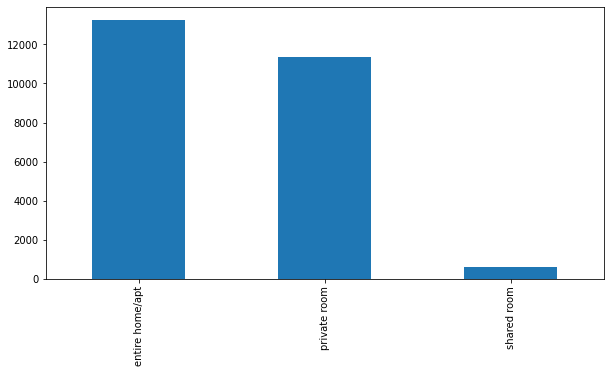

In [110]:
df['room_type'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

**แสดงข้อมูลจำนวนเมืองแต่ละเมืองใน New York City Airbnb Market**

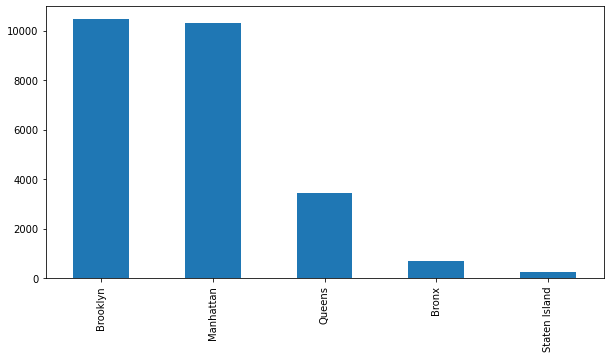

In [111]:
df['city'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

**เปรียบเทียบจำนวนประเภทห้องแต่ละประเภท Airbnb ระหว่าง 5 เมืองในนิวยอร์ค**

In [120]:
city = df[['city','room_type']].copy()
city['count'] = np.zeros(len(city))
city = city.groupby(['city', 'room_type']).count().reset_index()

city

,city,room_type,count
0,Bronx,entire home/apt,260
1,Bronx,private room,404
2,Bronx,shared room,33
3,Brooklyn,entire home/apt,5365
4,Brooklyn,private room,4903
5,Brooklyn,shared room,189
6,Manhattan,entire home/apt,6169
7,Manhattan,private room,3895
8,Manhattan,shared room,251
9,Queens,entire home/apt,1335


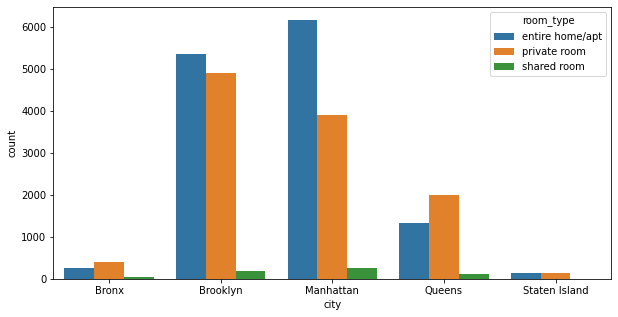

In [121]:
plt.figure(figsize=(10, 5))
sns.barplot(data=city, x="city", y="count", hue="room_type",errwidth=0)

**เปรียบเทียบราคาที่พักโดยเฉลี่ย Airbnb ระหว่าง 5 เมืองในนิวยอร์ค**

In [117]:
price = df[['city','room_type','price']].copy()
price = price.groupby(['city', 'room_type']).agg('mean').reset_index()
price

,city,room_type,price
0,Bronx,entire home/apt,120.692308
1,Bronx,private room,56.504498
2,Bronx,shared room,33.030303
3,Brooklyn,entire home/apt,169.932526
4,Brooklyn,private room,72.763057
5,Brooklyn,shared room,40.506000
6,Manhattan,entire home/apt,238.027395
7,Manhattan,private room,105.702953
8,Manhattan,shared room,72.960159
9,Queens,entire home/apt,140.931086


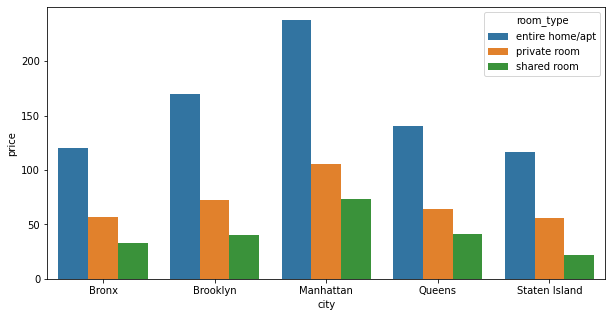

In [119]:
plt.figure(figsize=(10, 5))
sns.barplot(data=price, x="city", y="price", hue="room_type",errwidth=0)